# Objective 1:

# What are looking after data insights
    1. Is weekends or through week impact the data
    2. Does Seasonality categorizing the price
    3. Does neighbourhood variations
## Main factors that affecting  price of the property
## By above findings will try to create a model to predict the price of the property

## Loading Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import calendar
from re import sub
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Collection

In [2]:
cal= pd.read_csv('calendar.csv',parse_dates=['date'])
lst= pd.read_csv('listings.csv')
revws= pd.read_csv('reviews.csv')

In [4]:
lst.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
revws.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [7]:
lst.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

# Listing Dataset and selected features

In [9]:
listings= pd.DataFrame(lst[['id','host_is_superhost',
      'neighbourhood', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms','amenities', 'price',
        'number_of_reviews', 'review_scores_rating',
         'cancellation_policy',
       'reviews_per_month','neighbourhood_group_cleansed']])

In [13]:
# Response varible with missing percentage of data
cal.isna().sum()/cal.shape[0]

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

It seems 33% of data is missing in price attribute, by this I can say 67% data will be considerable. Let me verify from here.

In [14]:
#Need to conisder of date range 
print(pd.to_datetime(cal['date'].min()))
print(pd.to_datetime(cal['date'].max()))

2016-01-04 00:00:00
2017-01-02 00:00:00


During data wrangling need to sure about data types and missing percentage of data 

In [34]:
def get_null_col(df):
    null_col = df.columns[df.isna().sum()>0]
    col_null_val = df[null_col].isna().sum().sort_values(ascending=False)
    per_null_val = (df[null_col].isna().sum()/df.shape[0]*100).sort_values(ascending=False)
    nulls_df = pd.DataFrame(col_null_val,columns=['#Nulls'])
    nulls_df['%Nulls']=per_null_val
    print('Number of columns with missing data:',nulls_df.shape[0])
    return nulls_df

get_null_col(listings)

Number of columns with missing data: 7


,#Nulls,%Nulls
review_scores_rating,647,16.946045
reviews_per_month,627,16.422211
neighbourhood,416,10.895757
bathrooms,16,0.419068
bedrooms,6,0.157150
host_is_superhost,2,0.052383
property_type,1,0.026192


Dropping review_scores_rating since we have reviews_per_month.

Dropping off neighbourhood as we have similar neighbourhood_cleansed factor adn with less missing elements and richful information too.

In [17]:
listings.drop(['review_scores_rating','neighbourhood'], axis=1, inplace=True)

In [18]:
listings.dtypes

id                                int64
host_is_superhost                object
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
amenities                        object
price                            object
number_of_reviews                 int64
cancellation_policy              object
reviews_per_month               float64
neighbourhood_group_cleansed     object
dtype: object

bathroom, bedroom and host_is_superhost and property_type can be imputed with the mode

In [19]:
mode= listings.filter(['bathrooms','bedrooms','host_is_superhost','property_type']).mode()
col= ['bathrooms','bedrooms','host_is_superhost','property_type']
listings[col]=listings[col].fillna(listings.mode().iloc[0])

In [20]:
listings['reviews_per_month'].fillna((listings['reviews_per_month'].median()), inplace= True)

distribution of reviews_per_month will answer either mean or median will fit for the data

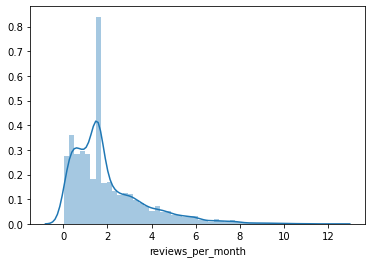

In [24]:
sns.distplot(listings['reviews_per_month'])
plt.show()

the data is right skewed, and it would be good to use median for imputation

In [25]:
listings['reviews_per_month'].fillna((listings['reviews_per_month'].median()), inplace= True)

In [26]:
listings.head()

,id,host_is_superhost,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,price,number_of_reviews,cancellation_policy,reviews_per_month,neighbourhood_group_cleansed
0,241032,f,Apartment,Entire home/apt,4,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,207,moderate,4.07,Queen Anne
1,953595,t,Apartment,Entire home/apt,4,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,43,strict,1.48,Queen Anne
2,3308979,f,House,Entire home/apt,11,4.5,5.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,20,strict,1.15,Queen Anne
3,7421966,f,Apartment,Entire home/apt,3,1.0,0.0,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,0,flexible,1.54,Queen Anne
4,278830,f,House,Entire home/apt,6,2.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,38,strict,0.89,Queen Anne


$ sign should remove from price attribute

# Price variable Cleaning

In [27]:
def clean_price(price):
    try:
        return float(sub(r'[^\d.]', '', price))
    except:
        return float(price)
listings['price'] = listings['price'].map(clean_price)
cal['price'] = cal['price'].map(clean_price)

In [28]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


In [29]:
cal['date'] = pd.to_datetime(cal['date'] )

#Computing the day of week
cal['dayofweek'] = cal['date'].apply(lambda x: x.day_name())

#Computing the month of the year
cal['month'] = cal['date'].apply(lambda x: x.month)

#Converting available to a boolean column
cal['available'] = cal['available'].apply(lambda x: x == 't')

In [30]:
cal.head()

,listing_id,date,available,price,dayofweek,month
0,241032,2016-01-04,True,85.0,Monday,1
1,241032,2016-01-05,True,85.0,Tuesday,1
2,241032,2016-01-06,False,NaN,Wednesday,1
3,241032,2016-01-07,False,NaN,Thursday,1
4,241032,2016-01-08,False,NaN,Friday,1


In [31]:
cal.groupby('dayofweek').mean()[['available']]

,available
dayofweek,
Friday,0.668911
Monday,0.671101
Saturday,0.667758
Sunday,0.673001
Thursday,0.669743
Tuesday,0.671954
Wednesday,0.671793


Seems no change in all the days

In [32]:
pd.merge(cal,listings[['id','neighbourhood_group_cleansed']], left_on = 'listing_id', right_on = 'id').groupby('neighbourhood_group_cleansed').mean().sort_values('available', ascending = False)['available']

neighbourhood_group_cleansed
Interbay               0.845330
Magnolia               0.774669
Lake City              0.768800
Delridge               0.747182
University District    0.744397
Northgate              0.722774
Beacon Hill            0.702809
West Seattle           0.701127
Ballard                0.692257
Seward Park            0.680012
Central Area           0.672354
Other neighborhoods    0.671685
Rainier Valley         0.670526
Downtown               0.649910
Capitol Hill           0.641048
Queen Anne             0.620423
Cascade                0.576174
Name: available, dtype: float64

In [33]:
pd.merge(cal,listings[['id','neighbourhood_group_cleansed']], left_on = 'listing_id', right_on = 'id').groupby(['neighbourhood_group_cleansed', 'dayofweek']).mean()['available'].unstack()

dayofweek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
neighbourhood_group_cleansed,,,,,,,
Ballard,0.685953,0.694586,0.684365,0.693395,0.691806,0.697241,0.698411
Beacon Hill,0.699153,0.703230,0.697360,0.701923,0.704205,0.707790,0.705997
Capitol Hill,0.642552,0.640378,0.641602,0.643942,0.640144,0.639601,0.639126
Cascade,0.572602,0.574942,0.572169,0.576491,0.577139,0.579948,0.579948
Central Area,0.668022,0.675308,0.667136,0.675005,0.672035,0.675005,0.673911
Delridge,0.749757,0.742298,0.750000,0.747809,0.746592,0.746105,0.747809
Downtown,0.646226,0.652581,0.645646,0.655733,0.646154,0.652721,0.650254
Interbay,0.844406,0.843911,0.846154,0.847902,0.844406,0.844406,0.846154
Lake City,0.767509,0.765981,0.764925,0.768657,0.772962,0.767796,0.773823


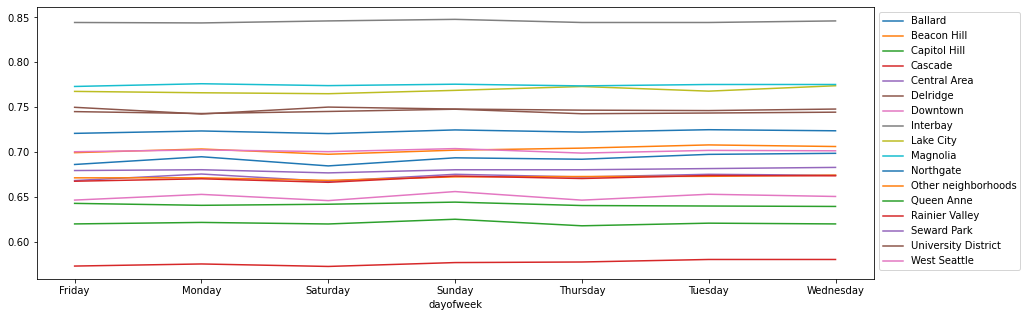

In [35]:
fig, ax = plt.subplots(1,1, figsize =(15,5))
# ax.set_xticks(list(range(1,13)))
pd.merge(cal,listings[['id','neighbourhood_group_cleansed']], left_on = 'listing_id', right_on = 'id').groupby(['dayofweek', 'neighbourhood_group_cleansed']).mean()['available'].unstack().plot(ax =ax)
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

So this do not show any variation for any neighborhood for any day of the week, it seems consistent

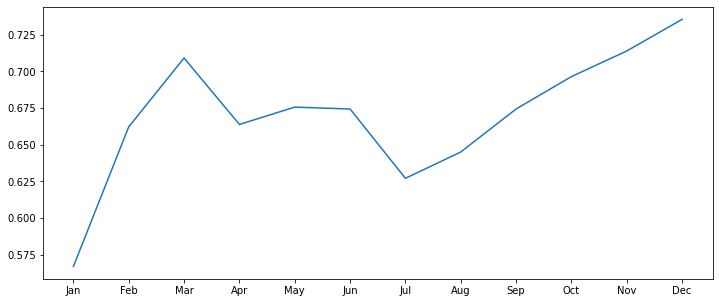

In [36]:
fig, ax = plt.subplots(1,1, figsize =(12,5))
ax.set_xticks(list(range(1,13)))
ax.set_xticklabels(calendar.month_abbr[1:13])
plt.plot(cal.groupby('month').mean().sort_values('month', ascending = True)['available'])
plt.show()

During Jan and Jul availability ratio is less, on the other hand Since Aug to Dec keeping availbility is high and Feb too.
There might be a reason to availbility percentage is low in beween April to July. That can give an insight to solve the case.

In [37]:
pd.merge(cal,listings[['id','neighbourhood_group_cleansed']],left_on = 'listing_id',right_on = 'id').groupby(['neighbourhood_group_cleansed', 'month']).mean()['available'].unstack()

month,1,2,3,4,5,6,7,8,9,10,11,12
neighbourhood_group_cleansed,,,,,,,,,,,,
Ballard,0.533043,0.613643,0.682889,0.668551,0.701964,0.731449,0.666199,0.700000,0.721449,0.741094,0.761159,0.779102
Beacon Hill,0.596045,0.692870,0.749043,0.720621,0.737015,0.723729,0.650082,0.696555,0.700847,0.705850,0.716102,0.742482
Capitol Hill,0.544680,0.629326,0.661888,0.613698,0.626842,0.641093,0.601639,0.614781,0.653322,0.680776,0.697942,0.724071
Cascade,0.457678,0.557148,0.635738,0.574532,0.592968,0.562172,0.492207,0.512142,0.584270,0.616890,0.644569,0.680681
Central Area,0.532249,0.655453,0.690532,0.641373,0.665093,0.682023,0.646210,0.662645,0.691689,0.707230,0.731165,0.758808
Delridge,0.611814,0.752510,0.770927,0.759072,0.764394,0.772152,0.714577,0.713761,0.754852,0.768885,0.783122,0.798693
Downtown,0.597925,0.707157,0.748448,0.692704,0.681862,0.644906,0.580158,0.593853,0.610063,0.631102,0.644277,0.668229
Interbay,0.833333,0.896552,0.909091,0.821212,0.812317,0.818182,0.809384,0.806452,0.818182,0.818182,0.893939,0.909091
Lake City,0.677114,0.728770,0.801637,0.787065,0.794896,0.788060,0.695234,0.719788,0.768657,0.819933,0.820896,0.820896


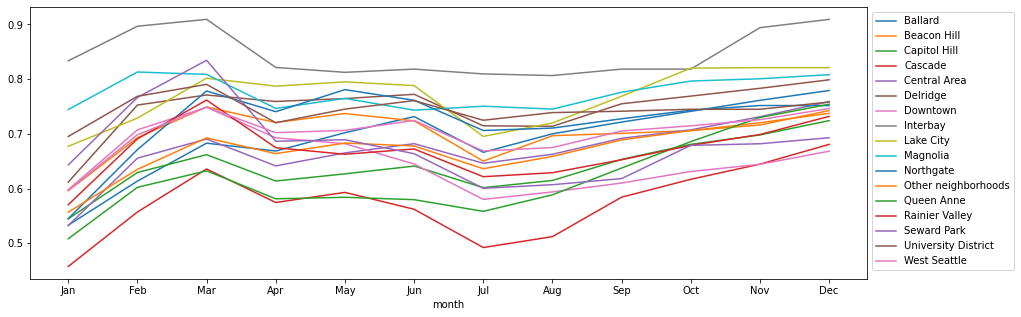

In [41]:
fig, ax = plt.subplots(1,1, figsize =(15,5))
ax.set_xticks(list(range(1,13)))
ax.set_xticklabels(calendar.month_abbr[1:13])
pd.merge(cal, listings[['id','neighbourhood_group_cleansed']], left_on = 'listing_id', right_on = 'id').groupby(['month', 'neighbourhood_group_cleansed']).mean()['available'].unstack().plot(ax =ax)
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

I dont think there is much variation among neighbourhood_group_cleansed,making little confusion to me.

# Second Case Feature Selection, main factors that drive through price

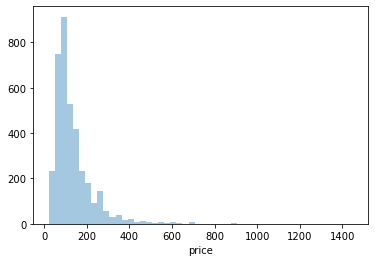

In [43]:
# The price variation
grouped_prices= cal.groupby('listing_id').median().round()
sns.distplot(grouped_prices['price'], hist=True, kde=False, bins=50 )
plt.show()

Most of are in between 100 - 300$ only. But high peak @ 100$

In [44]:
listings.groupby('neighbourhood_group_cleansed').mean().sort_values('price', ascending = False)[['price']]

,price
neighbourhood_group_cleansed,
Magnolia,177.672131
Queen Anne,157.223729
Downtown,154.405660
West Seattle,141.359606
Cascade,140.101124
Capitol Hill,130.592593
Central Area,128.338753
Ballard,124.682609
Other neighborhoods,119.968514


This is quiet intersting, few places are showig up high prices might be if I can include other major factors 
might be I can predict the price correctly.

In [45]:
def price_per_unit(price, units):
    if pd.isnull(units) or units == 0:
        return np.nan
    else:
        return price/units
listings['price_per_bedroom'] = listings.apply(lambda x: price_per_unit(x['price'],x['bedrooms']), axis = 1)
listings.groupby('neighbourhood_group_cleansed').mean().sort_values('price_per_bedroom', ascending = False)[['price_per_bedroom']]

,price_per_bedroom
neighbourhood_group_cleansed,
Downtown,129.413395
Cascade,113.896875
Queen Anne,109.114622
Interbay,102.909091
Capitol Hill,102.170668
Magnolia,101.028736
West Seattle,89.354497
Central Area,86.859012
Ballard,84.502701


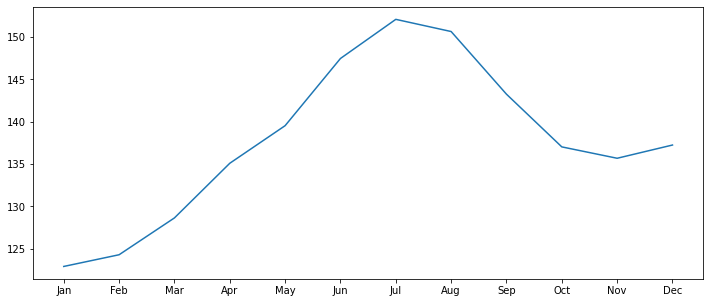

In [46]:
fig, ax = plt.subplots(1,1, figsize =(12,5))
ax.set_xticks(list(range(1,13)))
ax.set_xticklabels(calendar.month_abbr[1:13])
plt.plot(cal.groupby('month').mean().sort_values('month', ascending = True)['price'])
plt.show()

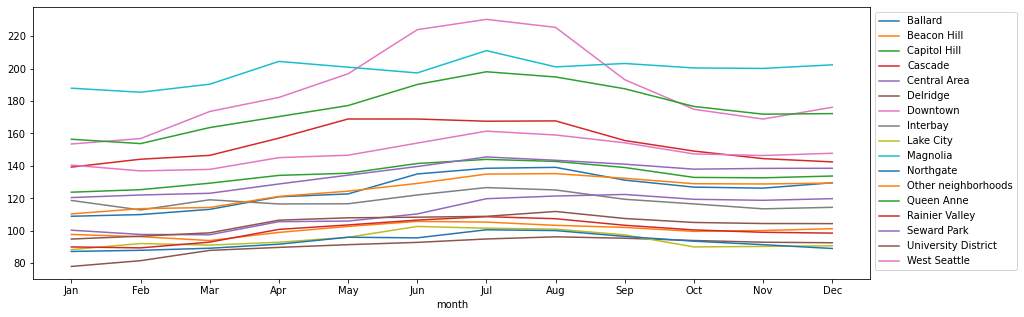

In [48]:
fig, ax = plt.subplots(1,1, figsize =(15,5))
ax.set_xticks(list(range(1,13)))
ax.set_xticklabels(calendar.month_abbr[1:13])
pd.merge(cal, listings[['id','neighbourhood_group_cleansed']], left_on = 'listing_id', right_on = 'id').groupby(['month', 'neighbourhood_group_cleansed']).mean()['price'].unstack().plot(ax =ax)
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

It's giving good amount of details about price hig during the season's and summer , winter are very costlier to visit Seattle.

In [50]:
cal.dropna(axis=0, inplace=True)

# Lets check with  Linaer Regression model

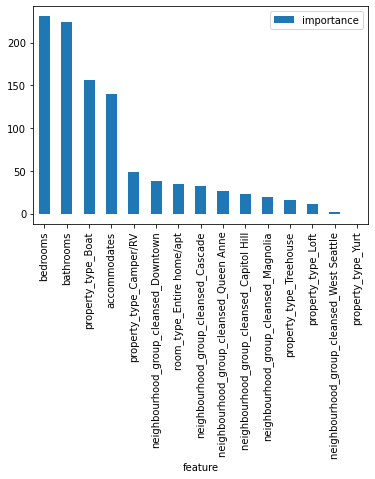

In [51]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

pd_model_data_x = listings[['neighbourhood_group_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms']]
pd_model_data_x['accommodates'] = min_max_scaler.fit_transform(pd_model_data_x[['accommodates']])
pd_model_data_x['bathrooms'] = min_max_scaler.fit_transform(pd_model_data_x[['bathrooms']])
pd_model_data_x['bedrooms'] = min_max_scaler.fit_transform(pd_model_data_x[['bedrooms']])

pd_model_data_x = pd.get_dummies(pd_model_data_x, columns=['neighbourhood_group_cleansed','property_type','room_type'])
pd_model_data_y = listings['price']

# train and test - x and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pd_model_data_x,pd_model_data_y,test_size=0.2, random_state=42)

# linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

coefficients = pd.DataFrame({'feature': X_train.columns, 'importance': lm.coef_})
_ = coefficients.sort_values('importance', ascending=False)[:15].plot(x='feature', y='importance', kind='bar')

By above feature selection bedrooms,bathrooms, property_type and accommodates are most significant features to the price.

In [52]:
y_test_preds = lm.predict(X_test)
y_train_preds = lm.predict(X_train)

In [53]:
from sklearn import metrics
from sklearn.metrics import r2_score
lm_mse = metrics.mean_squared_error(y_test, lm.predict(X_test))
lm_mse = np.sqrt(lm_mse)
print('Linear Regression MSE test: %.3f'% lm_mse)
print('Linear Regression R^2 test: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Linear Regression MSE test: 58.672
Linear Regression R^2 test: 0.568, test: 0.576


In [53]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor() 
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [54]:
des_tree_mse = metrics.mean_squared_error(y_test, tree_reg.predict(X_test))
des_tree_mse = np.sqrt(des_tree_mse)
print('Decision Tree MSE test: %.3f'% des_tree_mse)
print('Decision Tree R^2 test: %.3f' % (r2_score(y_test, y_test_preds)))

Decision Tree MSE test: 66.044
Decision Tree R^2 test: 0.576


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

forest = RandomForestRegressor(n_estimators=200,max_features='sqrt',criterion='mse', random_state=42, n_jobs=1)
forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (np.sqrt(mean_squared_error(y_train, y_train_preds)),np.sqrt(mean_squared_error(y_test, y_test_preds))))
print('Random Forest R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_preds),r2_score(y_test, y_test_preds)))

Random Forest MSE train: 41.999, test: 57.012
Random Forest R^2 train: 0.784, test: 0.600


In [57]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.05, gamma=0.0,colsample_bytree=0.2, max_depth=4)
xgb.fit(X_train,y_train)

#calculate and print scores for the model for top 15 features
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

[17:18:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [58]:
print('MSE train: %.3f, test: %.3f' % (np.sqrt(mean_squared_error(y_train, y_train_preds)),np.sqrt(mean_squared_error(y_test, y_test_preds))))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_preds),r2_score(y_test, y_test_preds)))

MSE train: 53.526, test: 55.139
R^2 train: 0.648, test: 0.625


By above all model's performance RF and Xgboost have maintained low MSE and better coefficient of determention.